### Analyzing the Impact of U.S. Presidential Cycles on Economic and Stock Market PerformanceTo Load the datasets 

In [1]:
# User defined function performing Basic EDA
import pandas as pd

def basic_eda(data, info=True, describe=True, missing_values=True):
    
    # Display basic information about the dataset
    if info:
        print("Basic Information:")
        print(data.info())
    
    # Display statistical summaries of the dataset
    if describe:
        print("\nStatistical Summary:")
        print(data.describe())
    
    # Check and display missing values
    if missing_values:
        missing_data = data.isnull().sum()
        print("\nMissing Values:")
        print(missing_data[missing_data > 0])
    
    return data

In [2]:
# Convert 'Years In Office' to tenure length
def calculate_tenure(years):
    try:
        start_year, end_year = map(int, years.split('-'))
        return end_year - start_year
    except ValueError:  # Handles cases where conversion to int fails
        return None  # Returns None if there is an issue with data format

In [3]:
import pandas as pd

# Define the file paths for the datasets
presidential_data_path = '../../dataset/presidents.csv'
gdp_data_path = '../../dataset/GDP.csv'
spy_data_path_part1 = '../../dataset/SPY ETF Stock Price History-Part1.csv'
spy_data_path_part2 = '../../dataset/SPY ETF Stock Price History-Part2.csv'

# Load the datasets into pandas DataFrames
presidential_data = pd.read_csv(presidential_data_path)
gdp_data = pd.read_csv(gdp_data_path)
spy_data_part1 = pd.read_csv(spy_data_path_part1)
spy_data_part2 = pd.read_csv(spy_data_path_part2)

# Combining SPY data parts into one DataFrame
spy_data = pd.concat([spy_data_part1, spy_data_part2], ignore_index=True)

# Display basic information about the datasets
presidential_data.info(), gdp_data.info(), spy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   President Name   46 non-null     object
 1   Years In Office  46 non-null     object
 2   Number           46 non-null     object
 3   Party            46 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    311 non-null    object 
 1   GDP     311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8027 entries, 0 to 8026
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8027 non-null   object 
 1   Price     8027 non-null   float64
 2   Open      8027 no

(None, None, None)

#### EDA & Data Preparation

EDA - Presidential Dataset
William H. Harrison (1841): Only the start year is provided, and he served for a very short time (he died in office).

James A. Garfield (1881): Similar to Harrison, only the start year is listed because he was assassinated early in his term.

Joe Biden (2021-): His term is ongoing, so only the start year is provided.

In [4]:
import datetime

# Correct the 'Years In Office' for William H. Harrison and James A. Garfield
presidential_data.loc[presidential_data['President Name'] == 'William H. Harrison', 'Years In Office'] = '1841-1841'
presidential_data.loc[presidential_data['President Name'] == 'James A. Garfield', 'Years In Office'] = '1881-1881'
presidential_data.loc[presidential_data['President Name'] == 'Joe Biden', 'Years In Office'] = '2021-2023'

# Re-calculate the tenure
presidential_data['Tenure'] = presidential_data['Years In Office'].apply(calculate_tenure)


current_year = datetime.datetime.now().year
presidential_data.loc[presidential_data['President Name'] == 'Joe Biden', 'Years In Office'] = f'2021-{current_year}'
presidential_data.loc[presidential_data['President Name'] == 'Joe Biden', 'Tenure'] = current_year - 2021

# Display corrected data and check for any remaining issues
presidential_data.head(n=3)


,President Name,Years In Office,Number,Party,Tenure
0,George Washington,1789-1797,1st,Federalist,8
1,John Adams,1797-1801,2nd,Federalist,4
2,Thomas Jefferson,1801-1809,3rd,Democratic Republican,8


In [5]:
# To extract the start and end year for each presidential term.
def extract_start_year(years):
    try:
        return int(years.split('-')[0])
    except ValueError:
        return None  # Return None if parsing fails

def extract_end_year(years):
    try:
        # This will handle cases where the end year might be missing or malformed
        return int(years.split('-')[1]) if '-' in years and years.split('-')[1] else extract_start_year(years)
    except ValueError:
        return None

In [6]:
# Apply the parsing functions
presidential_data['Start Year'] = presidential_data['Years In Office'].apply(extract_start_year)
presidential_data['End Year'] = presidential_data['Years In Office'].apply(extract_end_year) - 1

In [7]:
# Add Presidential term
# Calculate the duration of each term and expand it to individual years
presidential_data['Years'] = presidential_data.apply(lambda x: list(range(x['Start Year'], x['End Year'] + 1)), axis=1)
presidential_data = presidential_data.explode('Years')

# Calculate 'Term Year' by taking modulo 4 of the year's position in the term
presidential_data['Term Year'] = presidential_data.groupby('President Name').cumcount() % 4 + 1

In [8]:
presidential_data.tail(n=8)

,President Name,Years In Office,Number,Party,Tenure,Start Year,End Year,Years,Term Year
43,Barack Obama,2009-2017,44th,Democratic,8,2009,2016,2016,4
44,Donald Trump,2017-2021,45th,Republican,4,2017,2020,2017,1
44,Donald Trump,2017-2021,45th,Republican,4,2017,2020,2018,2
44,Donald Trump,2017-2021,45th,Republican,4,2017,2020,2019,3
44,Donald Trump,2017-2021,45th,Republican,4,2017,2020,2020,4
45,Joe Biden,2021-2024,46th,Democratic,3,2021,2023,2021,1
45,Joe Biden,2021-2024,46th,Democratic,3,2021,2023,2022,2
45,Joe Biden,2021-2024,46th,Democratic,3,2021,2023,2023,3


Here, the Presidentail period starts by Jan 20th of the year so considering that whole new and the marker growth is for the elected presidents sentiments.
and for the dataset we have Joe Biden's 3 year presidentail period.

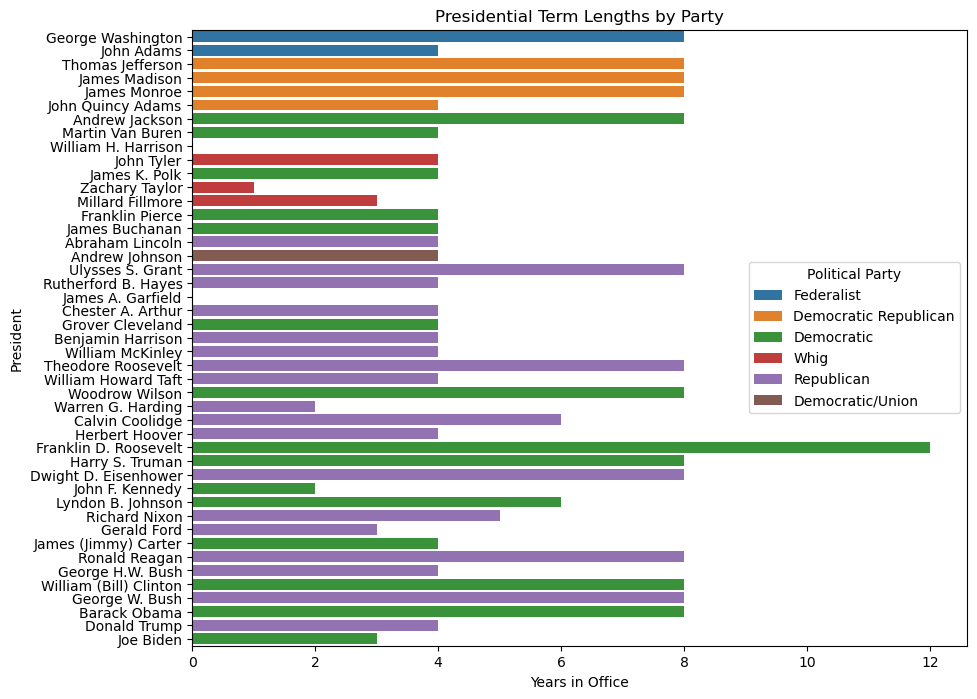

In [9]:
# EDA - Bar Chart of Presidential Term Lengths
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of presidential term lengths
plt.figure(figsize=(10, 8))
sns.barplot(x='Tenure', y='President Name', hue='Party', data=presidential_data, dodge=False)
plt.title('Presidential Term Lengths by Party')
plt.xlabel('Years in Office')
plt.ylabel('President')
plt.legend(title='Political Party')
plt.show()


The chart highlights the variations in term lengths, reflecting standard full terms, shorter terms due to various circumstances, and notably longer services such as Franklin D. Roosevelt's four-term presidency. The visualization efficiently encapsulates over two centuries of presidential history, emphasizing the political diversity and changes in leadership dynamics within the U.S. government. This graphic serves as a concise historical overview, aiding in understanding the political shifts and tenure patterns among U.S. Presidents.

#### EDA - GDP Dataset

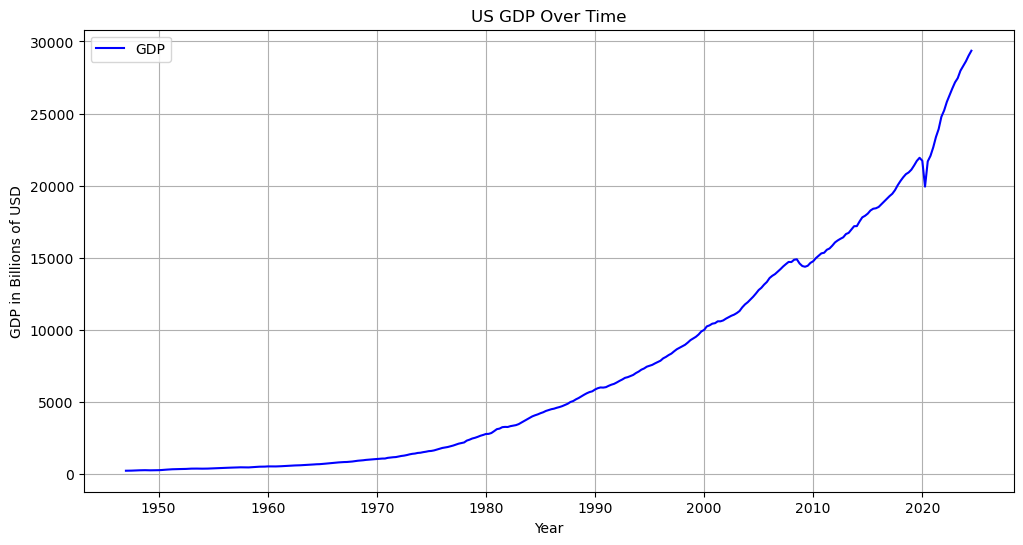

In [10]:
# Convert DATE to datetime and sort by date
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])
gdp_data.sort_values('DATE', inplace=True)

# Visualization of GDP over time
plt.figure(figsize=(12, 6))
plt.plot(gdp_data['DATE'], gdp_data['GDP'], label='GDP', color='blue')
plt.title('US GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP in Billions of USD')
plt.grid(True)
plt.legend()
plt.show()

The graph illustrates the exponential growth of the U.S. Gross Domestic Product (GDP) from 1950 through 2020. The trajectory shows a sustained increase with notable accelerations post-1980, reflecting periods of economic expansion and technological advancement. The sharp rise in recent years highlights significant economic growth, despite occasional fluctuations due to market and geopolitical influences.

In [11]:
# Merge GDP data with presidential terms

# Function to get detailed presidential term information
def get_presidential_details(year):
    for _, row in presidential_data.iterrows():
        if row['Start Year'] <= year <= row['End Year']:
            return {
                'President Name': row['President Name'],
                'Party': row['Party'],
                'Start Year': row['Start Year'],
                'End Year': row['End Year'],
                'Term Year': (year - row['Start Year']) % 4 + 1  # Calculate which year of the term it is
            }
    return {
        'President Name': 'No Term Found',
        'Party': None,
        'Start Year': None,
        'End Year': None,
        'Term Year': None
    }

# Applying the function to the GDP data
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])
gdp_data['Year'] = gdp_data['DATE'].dt.year

presidential_details = gdp_data['Year'].apply(get_presidential_details)
details_df = pd.DataFrame(presidential_details.tolist()) 

# Combine the detailed DataFrame with the original GDP data
gdp_data_combined = pd.concat([gdp_data, details_df], axis=1)

# Filter out rows where no presidential term was found
gdp_data_filtered = gdp_data_combined[gdp_data_combined['President Name'] != 'No Term Found']


In [12]:
# Convert 'Start Year' and 'End Year' to integers
gdp_data_filtered['Start Year'] = gdp_data_filtered['Start Year'].astype(int)
gdp_data_filtered['End Year'] = gdp_data_filtered['End Year'].astype(int)
gdp_data_filtered['Term Year'] = gdp_data_filtered['Term Year'].astype(int)
gdp_data_filtered.tail(n=4)

C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1368676774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['Start Year'] = gdp_data_filtered['Start Year'].astype(int)
C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1368676774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['End Year'] = gdp_data_filtered['End Year'].astype(int)
C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1368676774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,DATE,GDP,Year,President Name,Party,Start Year,End Year,Term Year
304,2023-01-01,27164.359,2023,Joe Biden,Democratic,2021,2023,3
305,2023-04-01,27453.815,2023,Joe Biden,Democratic,2021,2023,3
306,2023-07-01,27967.697,2023,Joe Biden,Democratic,2021,2023,3
307,2023-10-01,28296.967,2023,Joe Biden,Democratic,2021,2023,3


In [13]:
# Calculate yearly GDP growth rate
gdp_data_filtered['GDP Growth'] = gdp_data_filtered['GDP'].pct_change() * 100  # percentage change

# Calculate the mean GDP growth for each year and assign it back to the dataframe
gdp_data_filtered['Mean GDP Growth'] = gdp_data_filtered.groupby('Year')['GDP Growth'].transform('mean')



C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1167106698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['GDP Growth'] = gdp_data_filtered['GDP'].pct_change() * 100  # percentage change
C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1167106698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['Mean GDP Growth'] = gdp_data_filtered.groupby('Year')['GDP Growth'].transform('mean')


In [14]:
#gdp_data_filtered.to_csv('gdp_presidential_data.csv')

C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\2074343453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['Term Year'] = pd.Categorical(gdp_data_filtered['Term Year'], categories=[1, 2, 3, 4], ordered=True)


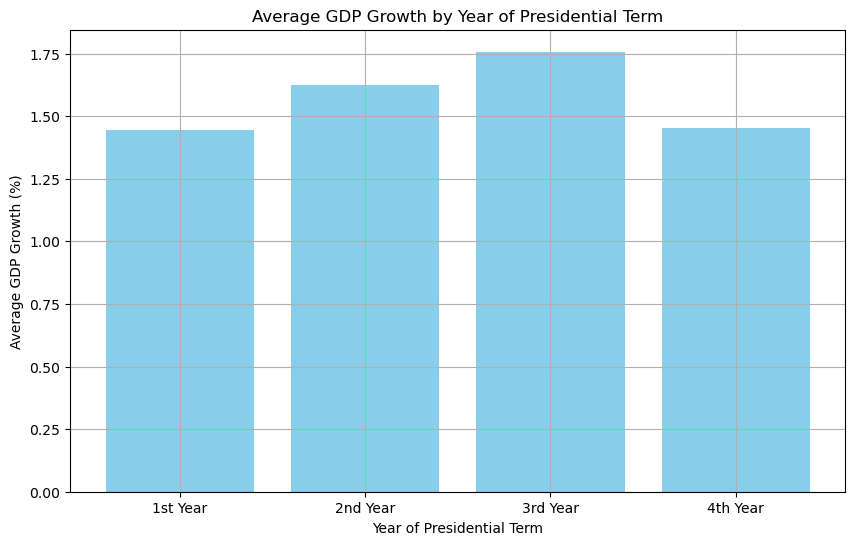

In [15]:
# Visualization GDP growth by year of presidential term

gdp_data_filtered['Term Year'] = pd.Categorical(gdp_data_filtered['Term Year'], categories=[1, 2, 3, 4], ordered=True)

# Calculate average GDP Growth for each 'Term Year'
average_growth = gdp_data_filtered.groupby('Term Year')['GDP Growth'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_growth.index, average_growth, color='skyblue')
plt.xlabel('Year of Presidential Term')
plt.ylabel('Average GDP Growth (%)')
plt.title('Average GDP Growth by Year of Presidential Term')
plt.xticks([1, 2, 3, 4], ['1st Year', '2nd Year', '3rd Year', '4th Year'])
plt.grid(True)
plt.show()

First Year: Typically shows lower GDP growth, which might be attributed to the transition phase of new administrations where new policies are being established and the market adapts to the changes.

Second and Third Years: These years often exhibit higher GDP growth, potentially reflecting the stabilization of policies and the government's more significant impact after settling in. This period may benefit from the initial introduction of stimulating policies and the public's growing confidence in the government's roadmap.

Fourth Year: The growth usually tapers off, possibly due to the uncertainty surrounding upcoming elections and potential policy changes with a new administration on the horizon.

C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1116291810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['DATE'] = pd.to_datetime(gdp_data_filtered['DATE'])
C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\1116291810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['Cumulative GDP Growth'] = gdp_data_filtered.groupby('President Name')['GDP Growth'].cumsum()


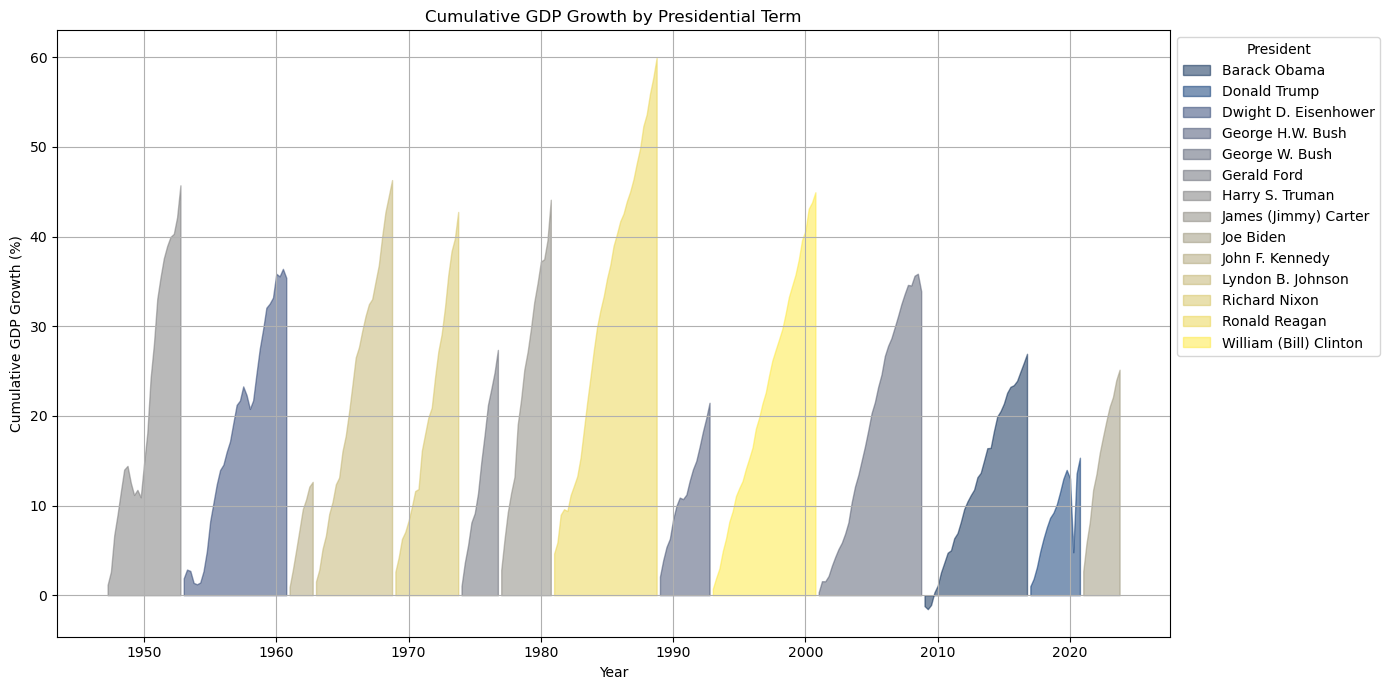

In [16]:
# visualization showing cumulative GDP growth by presidential term
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

gdp_data_filtered['DATE'] = pd.to_datetime(gdp_data_filtered['DATE'])
gdp_data_filtered['Cumulative GDP Growth'] = gdp_data_filtered.groupby('President Name')['GDP Growth'].cumsum()

plt.figure(figsize=(14, 7))

# Use a color cycle to distinguish different presidents visually
color_cycle = plt.cm.cividis(np.linspace(0, 1, gdp_data_filtered['President Name'].nunique()))

for (label, grp), color in zip(gdp_data_filtered.groupby('President Name'), color_cycle):
    plt.fill_between(grp['DATE'], grp['Cumulative GDP Growth'], label=label, color=color, alpha=0.5)

plt.title('Cumulative GDP Growth by Presidential Term')
plt.xlabel('Year')
plt.ylabel('Cumulative GDP Growth (%)')

# Adjusting the legend position outside the plot area on the right
plt.legend(title='President', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

The filled area chart effectively emphasizes the extent and variation of growth under each president, illustrating periods of economic expansion and slowdown. This format allows for a quick visual assessment of which presidents oversaw the greatest increases in GDP, making it easier to correlate economic policies or external factors with economic outcomes during each term.

C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\3294596980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_filtered['Term Year'] = gdp_data_filtered.groupby('President Name').cumcount() % 4 + 1
C:\Users\anbus\AppData\Local\Temp\ipykernel_20044\3294596980.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_presidents))


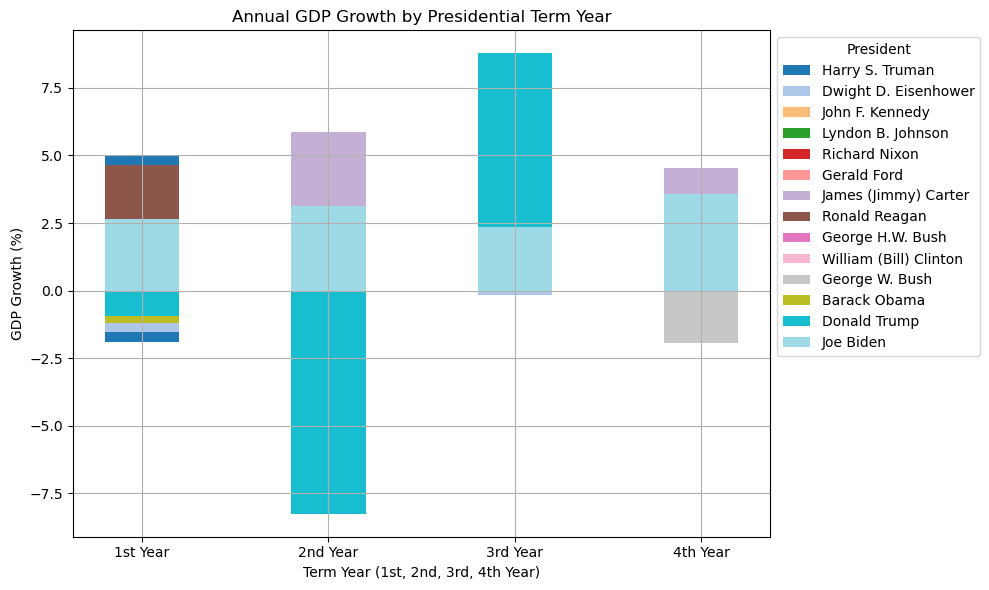

In [17]:
gdp_data_filtered['Term Year'] = gdp_data_filtered.groupby('President Name').cumcount() % 4 + 1

# Assign a unique color to each president
unique_presidents = gdp_data_filtered['President Name'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_presidents))

# Map each president to a color
color_map = {pres: colors(i) for i, pres in enumerate(unique_presidents)}

plt.figure(figsize=(10, 6))

# Plot each group
for president in unique_presidents:
    subset = gdp_data_filtered[gdp_data_filtered['President Name'] == president]
    plt.bar(subset['Term Year'], subset['GDP Growth'], color=color_map[president], width=0.4, label=president)

plt.title('Annual GDP Growth by Presidential Term Year')
plt.xlabel('Term Year (1st, 2nd, 3rd, 4th Year)')
plt.ylabel('GDP Growth (%)')
plt.xticks([1, 2, 3, 4], ['1st Year', '2nd Year', '3rd Year', '4th Year'])  # Set x-ticks to term years
plt.legend(title='President', loc='upper left', bbox_to_anchor=(1, 1)) 
#plt.legend(title='President')
plt.grid(True)
plt.tight_layout()
plt.show()

This visualization displays the annual GDP growth rates by presidential term year for various U.S. Presidents
The chart highlights variations in GDP growth across different years of presidential terms, showing how economic performance has fluctuated.
Certain years, particularly the first and third term years, show more significant variations in GDP growth compared to others.

In [18]:
# Aggregate SPY quarterly Data  - To merge SPY aligning with GDP & Presidential data

# Rename 'Date' column to 'DATE' for consistency
spy_data.rename(columns={'Date': 'DATE'}, inplace=True)

# Convert 'Date' columns to datetime
spy_data['DATE'] = pd.to_datetime(spy_data['DATE'])

# Calculate daily returns
spy_data['Returns'] = spy_data['Price'].pct_change()

# Convert to quarterly data by taking the last available data of the quarter
spy_data_return = spy_data.resample('Q', on='DATE').last().reset_index()

# Calculate quarterly returns for volatility calculation
spy_data_return['Quarterly_Returns'] = spy_data_return['Price'].pct_change()

# Calculate the volatility, annualized
spy_data_return['Quarterly_Volatility'] = spy_data_return['Quarterly_Returns'].rolling(window=4).std() * (4**0.5)


In [19]:
spy_data_return

,DATE,Price,Open,High,Low,Vol.,Change %,Returns,Quarterly_Returns,Quarterly_Volatility
0,1993-03-31,45.19,45.34,45.47,45.19,111.60K,-0.07%,0.003553,NaN,NaN
1,1993-06-30,45.06,45.12,45.22,45.00,437.60K,0.00%,0.002670,-0.002877,NaN
2,1993-09-30,45.94,46.03,46.12,45.84,99.30K,-0.20%,-0.004766,0.019530,NaN
3,1993-12-31,46.59,46.94,47.00,46.56,317.90K,-0.53%,0.002582,0.014149,NaN
4,1994-03-31,44.59,44.47,44.69,43.53,788.80K,0.27%,0.015486,-0.042928,0.056520
...,...,...,...,...,...,...,...,...,...,...
123,2023-12-31,475.31,476.49,477.03,473.30,122.28M,-0.29%,0.005628,0.111888,0.128799
124,2024-03-31,523.07,523.21,524.61,522.78,96.29M,-0.02%,0.001743,0.100482,0.136150
125,2024-06-30,544.22,547.16,550.28,542.95,76.14M,-0.39%,-0.002054,0.040434,0.135308
126,2024-09-30,573.76,570.42,574.38,568.08,63.66M,0.40%,0.009039,0.054280,0.069490


In [20]:
# Aggregate SPY yearly Data  - To merge SPY aligning with GDP & Presidential data

# Rename 'Date' column to 'DATE' for consistency
spy_data.rename(columns={'Date': 'DATE'}, inplace=True)

# Convert 'Date' columns to datetime
spy_data['DATE'] = pd.to_datetime(spy_data['DATE'])

spy_data['Year'] = spy_data['DATE'].dt.year

# Aggregate data by year to get the last available data point each year (typically the closing price of the last trading day)
yearly_spy_data = spy_data.groupby('Year')['Price'].last().reset_index()

# Calculate year-over-year percentage change in the closing price
yearly_spy_data['YoY Growth (%)'] = yearly_spy_data['Price'].pct_change() * 100

# Display the yearly data
print(yearly_spy_data)

    Year   Price  YoY Growth (%)
0   1993   44.25             NaN
1   1994   46.47        5.016949
2   1995   45.78       -1.484829
3   1996   62.14       35.736129
4   1997   74.03       19.134213
5   1998   97.56       31.784412
6   1999  123.03       26.107011
7   2000  145.44       18.215069
8   2001  128.81      -11.434268
9   2002  115.53      -10.309759
10  2003   91.07      -21.171990
11  2004  111.23       22.136818
12  2005  120.30        8.154275
13  2006  126.70        5.320033
14  2007  141.37       11.578532
15  2008  144.93        2.518215
16  2009   92.96      -35.858690
17  2010  113.33       21.912651
18  2011  127.05       12.106238
19  2012  141.25       11.176702
20  2013  146.06        3.405310
21  2014  182.92       25.236204
22  2015  205.43       12.305926
23  2016  201.02       -2.146717
24  2017  225.24       12.048552
25  2018  268.77       19.326052
26  2019  250.18       -6.916695
27  2020  324.87       29.854505
28  2021  368.79       13.519254
29  2022  

In [22]:
# Move YOY growth data to quarterly dataset.

# Extract year from the 'DATE' column in the quarterly dataset
spy_data_return['Year'] = pd.to_datetime(spy_data_return['DATE']).dt.year

# Merge the two datasets on the 'Year' column
spy_data_full = spy_data_return.merge(yearly_spy_data[['Year', 'YoY Growth (%)']], on='Year', how='left')

# Drop duplicate 'Price' column if present
if 'Price_y' in spy_data_full.columns:
    spy_data_full.drop('Price_y', axis=1, inplace=True)

# Rename columns if necessary
spy_data_full.rename(columns={'Price_x': 'Price'}, inplace=True)

# Display the merged DataFrame
#print(spy_data_full.head())



        DATE  Price   Open   High    Low     Vol. Change %   Returns  \
0 1993-03-31  45.19  45.34  45.47  45.19  111.60K   -0.07%  0.003553   
1 1993-06-30  45.06  45.12  45.22  45.00  437.60K    0.00%  0.002670   
2 1993-09-30  45.94  46.03  46.12  45.84   99.30K   -0.20% -0.004766   
3 1993-12-31  46.59  46.94  47.00  46.56  317.90K   -0.53%  0.002582   
4 1994-03-31  44.59  44.47  44.69  43.53  788.80K    0.27%  0.015486   

   Quarterly_Returns  Quarterly_Volatility  Year  YoY Growth (%)  
0                NaN                   NaN  1993             NaN  
1          -0.002877                   NaN  1993             NaN  
2           0.019530                   NaN  1993             NaN  
3           0.014149                   NaN  1993             NaN  
4          -0.042928               0.05652  1994        5.016949  


In [23]:
#spy_data_full.to_csv("spy_data_full.csv")

In [25]:
spy_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  128 non-null    datetime64[ns]
 1   Price                 128 non-null    float64       
 2   Open                  128 non-null    float64       
 3   High                  128 non-null    float64       
 4   Low                   128 non-null    float64       
 5   Vol.                  128 non-null    object        
 6   Change %              128 non-null    object        
 7   Returns               128 non-null    float64       
 8   Quarterly_Returns     127 non-null    float64       
 9   Quarterly_Volatility  124 non-null    float64       
 10  Year                  128 non-null    int32         
 11  YoY Growth (%)        124 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int32(1), object(2)
memory usage: 11.6+ KB


In [26]:
gdp_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   308 non-null    datetime64[ns]
 1   GDP                    308 non-null    float64       
 2   Year                   308 non-null    int32         
 3   President Name         308 non-null    object        
 4   Party                  308 non-null    object        
 5   Start Year             308 non-null    int32         
 6   End Year               308 non-null    int32         
 7   Term Year              308 non-null    int64         
 8   GDP Growth             307 non-null    float64       
 9   Mean GDP Growth        308 non-null    float64       
 10  Cumulative GDP Growth  307 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(2)
memory usage: 25.3+ KB


In [28]:
# Merge the two datasets based on nearest dates
SPY_GDP_presidential_merged_data = pd.merge_asof(spy_data_full.sort_values('DATE'),
                            gdp_data_filtered.sort_values('DATE'),
                            on='DATE',
                            direction='nearest')

# Display the first few rows of the merged dataset
SPY_GDP_presidential_merged_data.head()

,DATE,Price,Open,High,Low,Vol.,Change %,Returns,Quarterly_Returns,Quarterly_Volatility,...,GDP,Year_y,President Name,Party,Start Year,End Year,Term Year,GDP Growth,Mean GDP Growth,Cumulative GDP Growth
0,1993-03-31,45.19,45.34,45.47,45.19,111.60K,-0.07%,0.003553,NaN,NaN,...,6808.939,1993,William (Bill) Clinton,Democratic,1993,2000,2,1.181076,1.224154,1.909371
1,1993-06-30,45.06,45.12,45.22,45.00,437.60K,0.00%,0.002670,-0.002877,NaN,...,6882.098,1993,William (Bill) Clinton,Democratic,1993,2000,3,1.074455,1.224154,2.983827
2,1993-09-30,45.94,46.03,46.12,45.84,99.30K,-0.20%,-0.004766,0.019530,NaN,...,7013.738,1993,William (Bill) Clinton,Democratic,1993,2000,4,1.912789,1.224154,4.896615
3,1993-12-31,46.59,46.94,47.00,46.56,317.90K,-0.53%,0.002582,0.014149,NaN,...,7115.652,1994,William (Bill) Clinton,Democratic,1993,2000,1,1.453063,1.538357,6.349678
4,1994-03-31,44.59,44.47,44.69,43.53,788.80K,0.27%,0.015486,-0.042928,0.05652,...,7246.931,1994,William (Bill) Clinton,Democratic,1993,2000,2,1.844933,1.538357,8.194611


In [29]:
#SPY_GDP_presidential_merged_data.to_csv("SPY_GDP_presidential_merged_data.csv")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


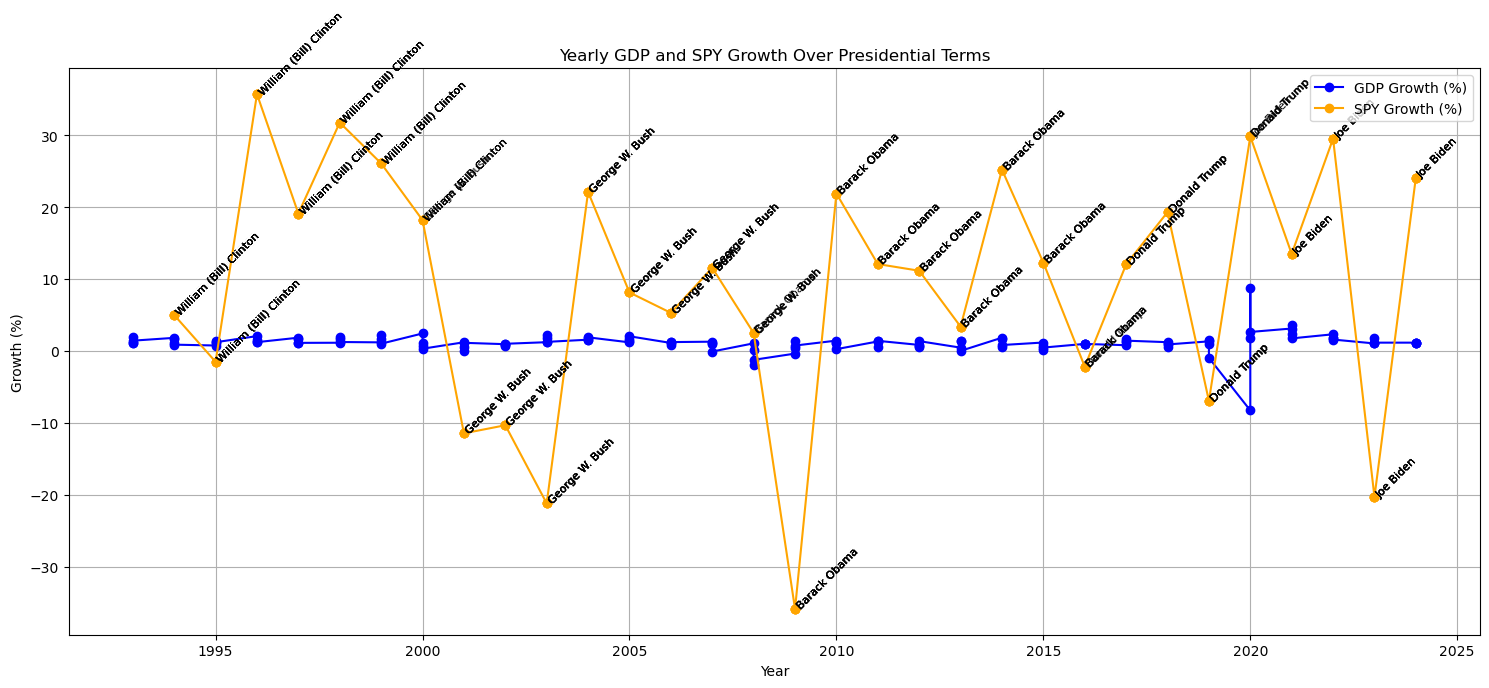

In [33]:
import seaborn as sns


# Extract year and term year for plotting
SPY_GDP_presidential_merged_data['Year'] = SPY_GDP_presidential_merged_data['DATE'].dt.year

# Yearly GDP and SPY Growth Over Presidential Terms
plt.figure(figsize=(15, 7))
plt.plot(SPY_GDP_presidential_merged_data['Year'], SPY_GDP_presidential_merged_data['GDP Growth'], '-o', color='blue', label='GDP Growth (%)')
plt.plot(SPY_GDP_presidential_merged_data['Year'], SPY_GDP_presidential_merged_data['YoY Growth (%)'], '-o', color='orange', label='SPY Growth (%)')

# Annotate with President names
for i, txt in enumerate(SPY_GDP_presidential_merged_data['President Name']):
    plt.text(SPY_GDP_presidential_merged_data['Year'].iloc[i], SPY_GDP_presidential_merged_data['YoY Growth (%)'].iloc[i], txt, rotation=45, fontsize=8)

plt.title('Yearly GDP and SPY Growth Over Presidential Terms')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Yearly GDP and SPY Growth Over Presidential Terms:

Summary: The line chart shows yearly GDP growth (stable) and SPY growth (volatile) annotated by the president's name. SPY growth fluctuates more significantly compared to GDP growth.
Insight: SPY growth tends to be more volatile, reflecting market sentiment influenced by economic conditions and presidential terms.

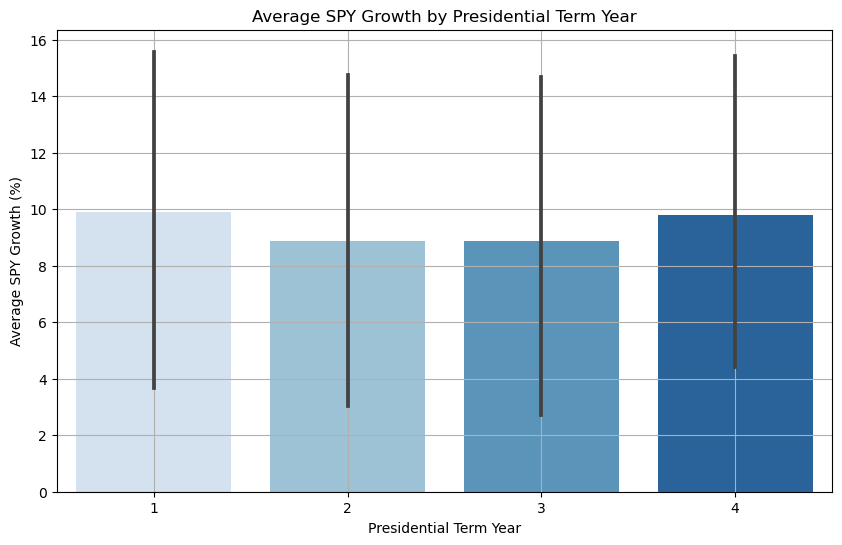

In [35]:
#  Average SPY Growth by Presidential Term Year
plt.figure(figsize=(10, 6))
sns.barplot(data=SPY_GDP_presidential_merged_data, x='Term Year', y='YoY Growth (%)', palette='Blues')
plt.title('Average SPY Growth by Presidential Term Year')
plt.xlabel('Presidential Term Year')
plt.ylabel('Average SPY Growth (%)')
plt.grid(True)
plt.show()

Average SPY Growth by Presidential Term Year:

Summary: The bar chart shows that average SPY growth varies by term year, with a trend of higher returns in the 2nd and 4th years.
Insight: This aligns with historical trends where mid-term years often experience stronger stock market performance.

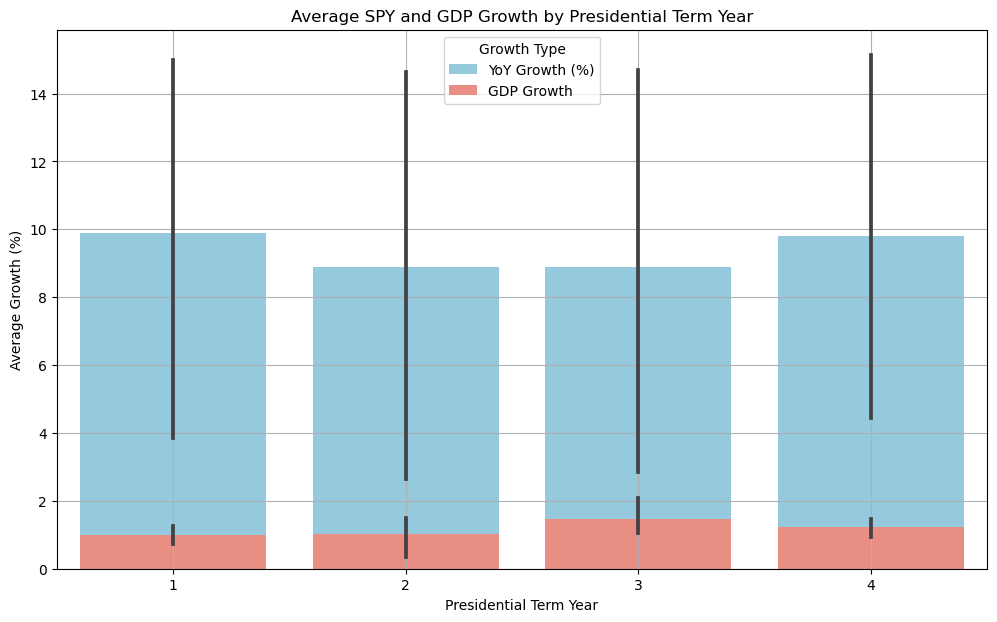

In [36]:
# Average SPY and GDP Growth by Presidential Term Year
plt.figure(figsize=(12, 7))
sns.barplot(data=SPY_GDP_presidential_merged_data, x='Term Year', y='YoY Growth (%)', color='skyblue', label='YoY Growth (%)')
sns.barplot(data=SPY_GDP_presidential_merged_data, x='Term Year', y='GDP Growth', color='salmon', label='GDP Growth')

plt.title('Average SPY and GDP Growth by Presidential Term Year')
plt.xlabel('Presidential Term Year')
plt.ylabel('Average Growth (%)')
plt.legend(title='Growth Type')
plt.grid(True)
plt.show()

Average SPY and GDP Growth by Presidential Term Year:

Summary: A grouped bar chart comparing SPY growth and GDP growth across each presidential term year shows SPY growth outpacing GDP growth.
Insight: SPY growth exhibits higher variability, while GDP growth remains relatively stable

####  Presidential Election Cycle Theory

Summary:

Yale Hirsch's Presidential Election Cycle Theory suggests that the stock market tends to perform better in the 2nd half of a presidential term (3rd and 4th years).

Alignment: The visualizations support this theory, showing higher SPY growth in the 2nd and 4th years, consistent with historical patterns of increased market optimism and economic stimulus before elections.

based on the "Average SPY Growth by Presidential Term Year" visualization, it appears that the 1st year of a presidential term also shows notable performance:

The bar chart indicates that the 1st year has average SPY growth comparable to or slightly better than some of the other years.
This challenges the traditional Presidential Election Cycle Theory by Yale Hirsch, which suggests that the 1st year typically experiences weaker market performance due to post-election policy changes and uncertainty.

Key Insights:
1st Year Performance: The visualization shows that the 1st year has higher-than-expected average SPY growth, which deviates from the classic theory.
Possible Reasons: This could be due to recent economic conditions, stimulus measures, or unique market reactions during recent presidential terms.
Modern Trends: The traditional cycle might be evolving, influenced by factors such as globalization, monetary policy, and unprecedented events (e.g., the COVID-19 pandemic).

In conclusion, while the 2nd and 4th years still show strong performance in line with the theory, the 1st year in recent times also exhibits better-than-expected returns.

#### SPY prediction 

In [39]:
#pip install prophet

GDP Projections: Assumed GDP growth rates of 3.1% for 2024 and 3.2% for 2025 are integrated into the forecast.

Model: The forecast uses Facebook's Prophet, a time-series forecasting tool designed for handling daily or seasonal trends with ease.


05:22:38 - cmdstanpy - INFO - Chain [1] start processing
05:22:38 - cmdstanpy - INFO - Chain [1] done processing


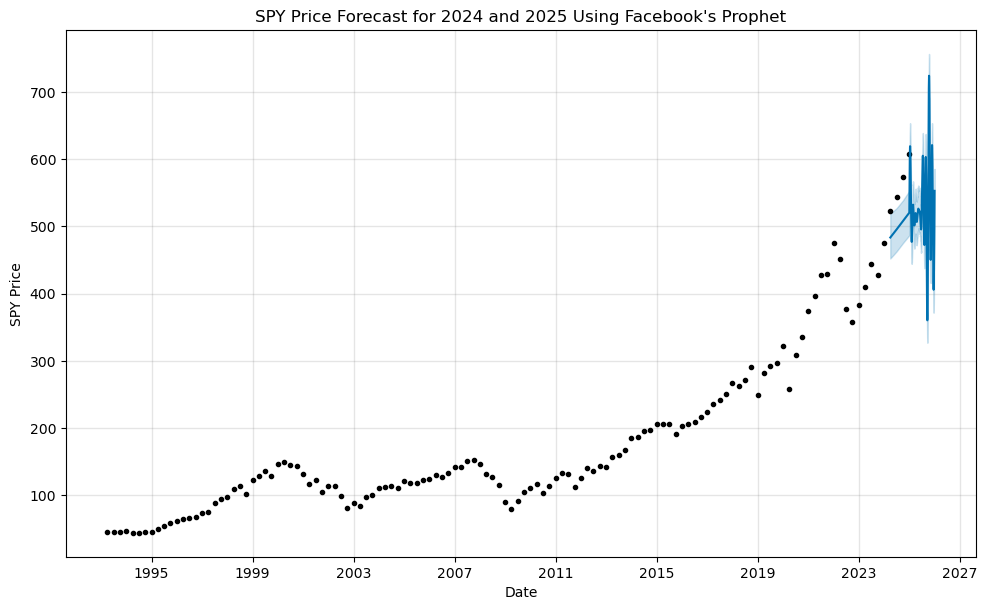

            ds        yhat  yhat_lower  yhat_upper  GDP Growth
0   2024-03-31  483.337623  452.148704  518.566558         NaN
1   2024-06-30  495.314676  462.660973  526.951881         NaN
2   2024-09-30  507.780304  475.081160  538.530767         NaN
3   2024-12-31  520.247406  486.665317  552.812599         NaN
4   2025-01-01  535.329564  503.126156  566.963756         3.2
..         ...         ...         ...         ...         ...
364 2025-12-27  490.154587  458.704496  523.701391         NaN
365 2025-12-28  505.525807  473.217915  537.186515         NaN
366 2025-12-29  521.249596  489.493782  553.197419         NaN
367 2025-12-30  537.063946  505.586639  567.851208         NaN
368 2025-12-31  552.709582  518.358834  585.285037         NaN

[369 rows x 5 columns]


In [42]:
from prophet import Prophet

#Prepare the dataset for Prophet (using 'DATE' and 'Price' columns)
spy_data = SPY_GDP_presidential_merged_data[['DATE', 'Price']].rename(columns={'DATE': 'ds', 'Price': 'y'})

# Add GDP growth projections for 2024 and 2025
gdp_growth_projections = pd.DataFrame({
    'ds': pd.to_datetime(['2024-01-01', '2025-01-01']),
    'GDP Growth': [3.1, 3.2]
})

# Fit the Prophet model
model = Prophet()
model.fit(spy_data)

# Create a dataframe for future dates up to 2025
future = model.make_future_dataframe(periods=730)  # Approximately 2 years ahead

# Make predictions
forecast = model.predict(future)

# Filter forecast for 2024 and 2025 only
forecast_2024_2025 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2025-12-31')]

# Plot the forecast for 2024 and 2025
fig = model.plot(forecast_2024_2025)
plt.title('SPY Price Forecast for 2024 and 2025 Using Facebook\'s Prophet')
plt.xlabel('Date')
plt.ylabel('SPY Price')
plt.show()

# Merge GDP growth projections with forecast data
forecast_with_gdp = forecast_2024_2025.merge(gdp_growth_projections, on='ds', how='left')

# Display forecast with GDP growth for 2024 and 2025
print(forecast_with_gdp[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'GDP Growth']])


In [43]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Filter the forecast to match available actual data
actual_data = spy_data[spy_data['ds'] <= forecast['ds'].max()]
predicted_data = forecast[forecast['ds'].isin(actual_data['ds'])]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_data['y'], predicted_data['yhat'])
rmse = np.sqrt(mean_squared_error(actual_data['y'], predicted_data['yhat']))
mape = np.mean(np.abs((actual_data['y'] - predicted_data['yhat']) / actual_data['y'])) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 18.58
Root Mean Squared Error (RMSE): 25.57
Mean Absolute Percentage Error (MAPE): 12.48%


Mean Absolute Error (MAE): 18.58

The average prediction error is approximately $18.58, indicating the typical deviation between the predicted and actual SPY prices.
Root Mean Squared Error (RMSE): 25.57

The RMSE value of $25.57 suggests that larger errors contribute significantly to the overall error, highlighting some volatility or outlier predictions.
Mean Absolute Percentage Error (MAPE): 12.48%

On average, the model's predictions deviate by about 12.48% from actual SPY prices. This is a reasonable error margin for financial market predictions, given market volatility.